In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

**CRIM:** per capita crime rate by town

**ZN:** proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS:** proportion of non-retail business acres per town

**CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX:** nitric oxides concentration (parts per 10 million)

**RM:** average number of rooms per dwelling

**AGE:** proportion of owner-occupied units built prior to 1940

**DIS:** weighted distances to ﬁve Boston employment centers

**RAD:** index of accessibility to radial highways

**TAX:** full-value property-tax rate per $10,000

**PTRATIO:** pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. 

**LSTAT:** porc lower status of the population

**MEDV:** Median value of owner-occupied homes in $1000s We can see that the input attributes have a mixture of units.


In [3]:
data_train = pd.read_csv('./HousingData_train.csv')

In [4]:
data_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     447 non-null    float64
 1   ZN       448 non-null    float64
 2   INDUS    448 non-null    float64
 3   CHAS     449 non-null    float64
 4   NOX      467 non-null    float64
 5   RM       467 non-null    float64
 6   AGE      448 non-null    float64
 7   DIS      467 non-null    float64
 8   RAD      467 non-null    int64  
 9   TAX      467 non-null    int64  
 10  PTRATIO  467 non-null    float64
 11  B        467 non-null    float64
 12  LSTAT    449 non-null    float64
 13  MEDV     467 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 51.2 KB


In [6]:
data_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,447.000000,448.000000,448.000000,449.000000,467.000000,467.000000,448.000000,467.000000,467.000000,467.000000,467.000000,467.000000,449.000000,467.000000
mean,3.421270,10.930804,11.169196,0.069042,0.553545,6.292741,68.152232,3.762997,9.468951,405.644540,18.341113,354.537687,12.601938,22.768308
std,7.935927,22.789075,6.921654,0.253809,0.115172,0.714266,27.892359,2.002119,8.671929,169.161749,2.177228,94.204705,7.219214,9.304239
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079960,0.000000,5.175000,0.000000,0.449000,5.888500,45.325000,2.087550,4.000000,277.000000,16.900000,374.495000,6.920000,17.100000
50%,0.249800,0.000000,9.900000,0.000000,0.532000,6.216000,76.500000,3.272100,5.000000,329.000000,18.700000,391.230000,11.100000,21.500000
75%,3.397665,12.500000,18.100000,0.000000,0.624000,6.630500,93.650000,5.164950,24.000000,666.000000,20.200000,396.220000,16.650000,25.750000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


### Nan Exploration ##

<AxesSubplot:>

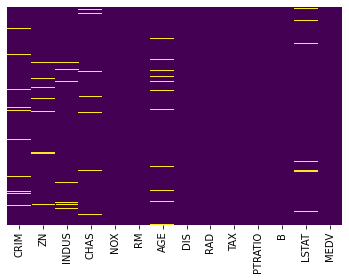

In [7]:
sns.heatmap(data_train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [8]:
# % of null compare to total values 
data_train.isnull().sum()/data_train.count() * 100

CRIM       4.474273
ZN         4.241071
INDUS      4.241071
CHAS       4.008909
NOX        0.000000
RM         0.000000
AGE        4.241071
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      4.008909
MEDV       0.000000
dtype: float64

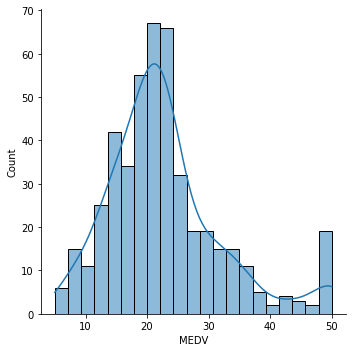

In [9]:
sns.displot(x='MEDV', data=data_train, kde=True) 

In [10]:
# approximately normally distributed with most values between 15 and 30

<AxesSubplot:xlabel='MEDV'>

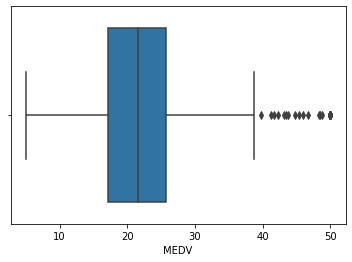

In [11]:
sns.boxplot(x='MEDV', data=data_train)

In [12]:
# some outliers after 40

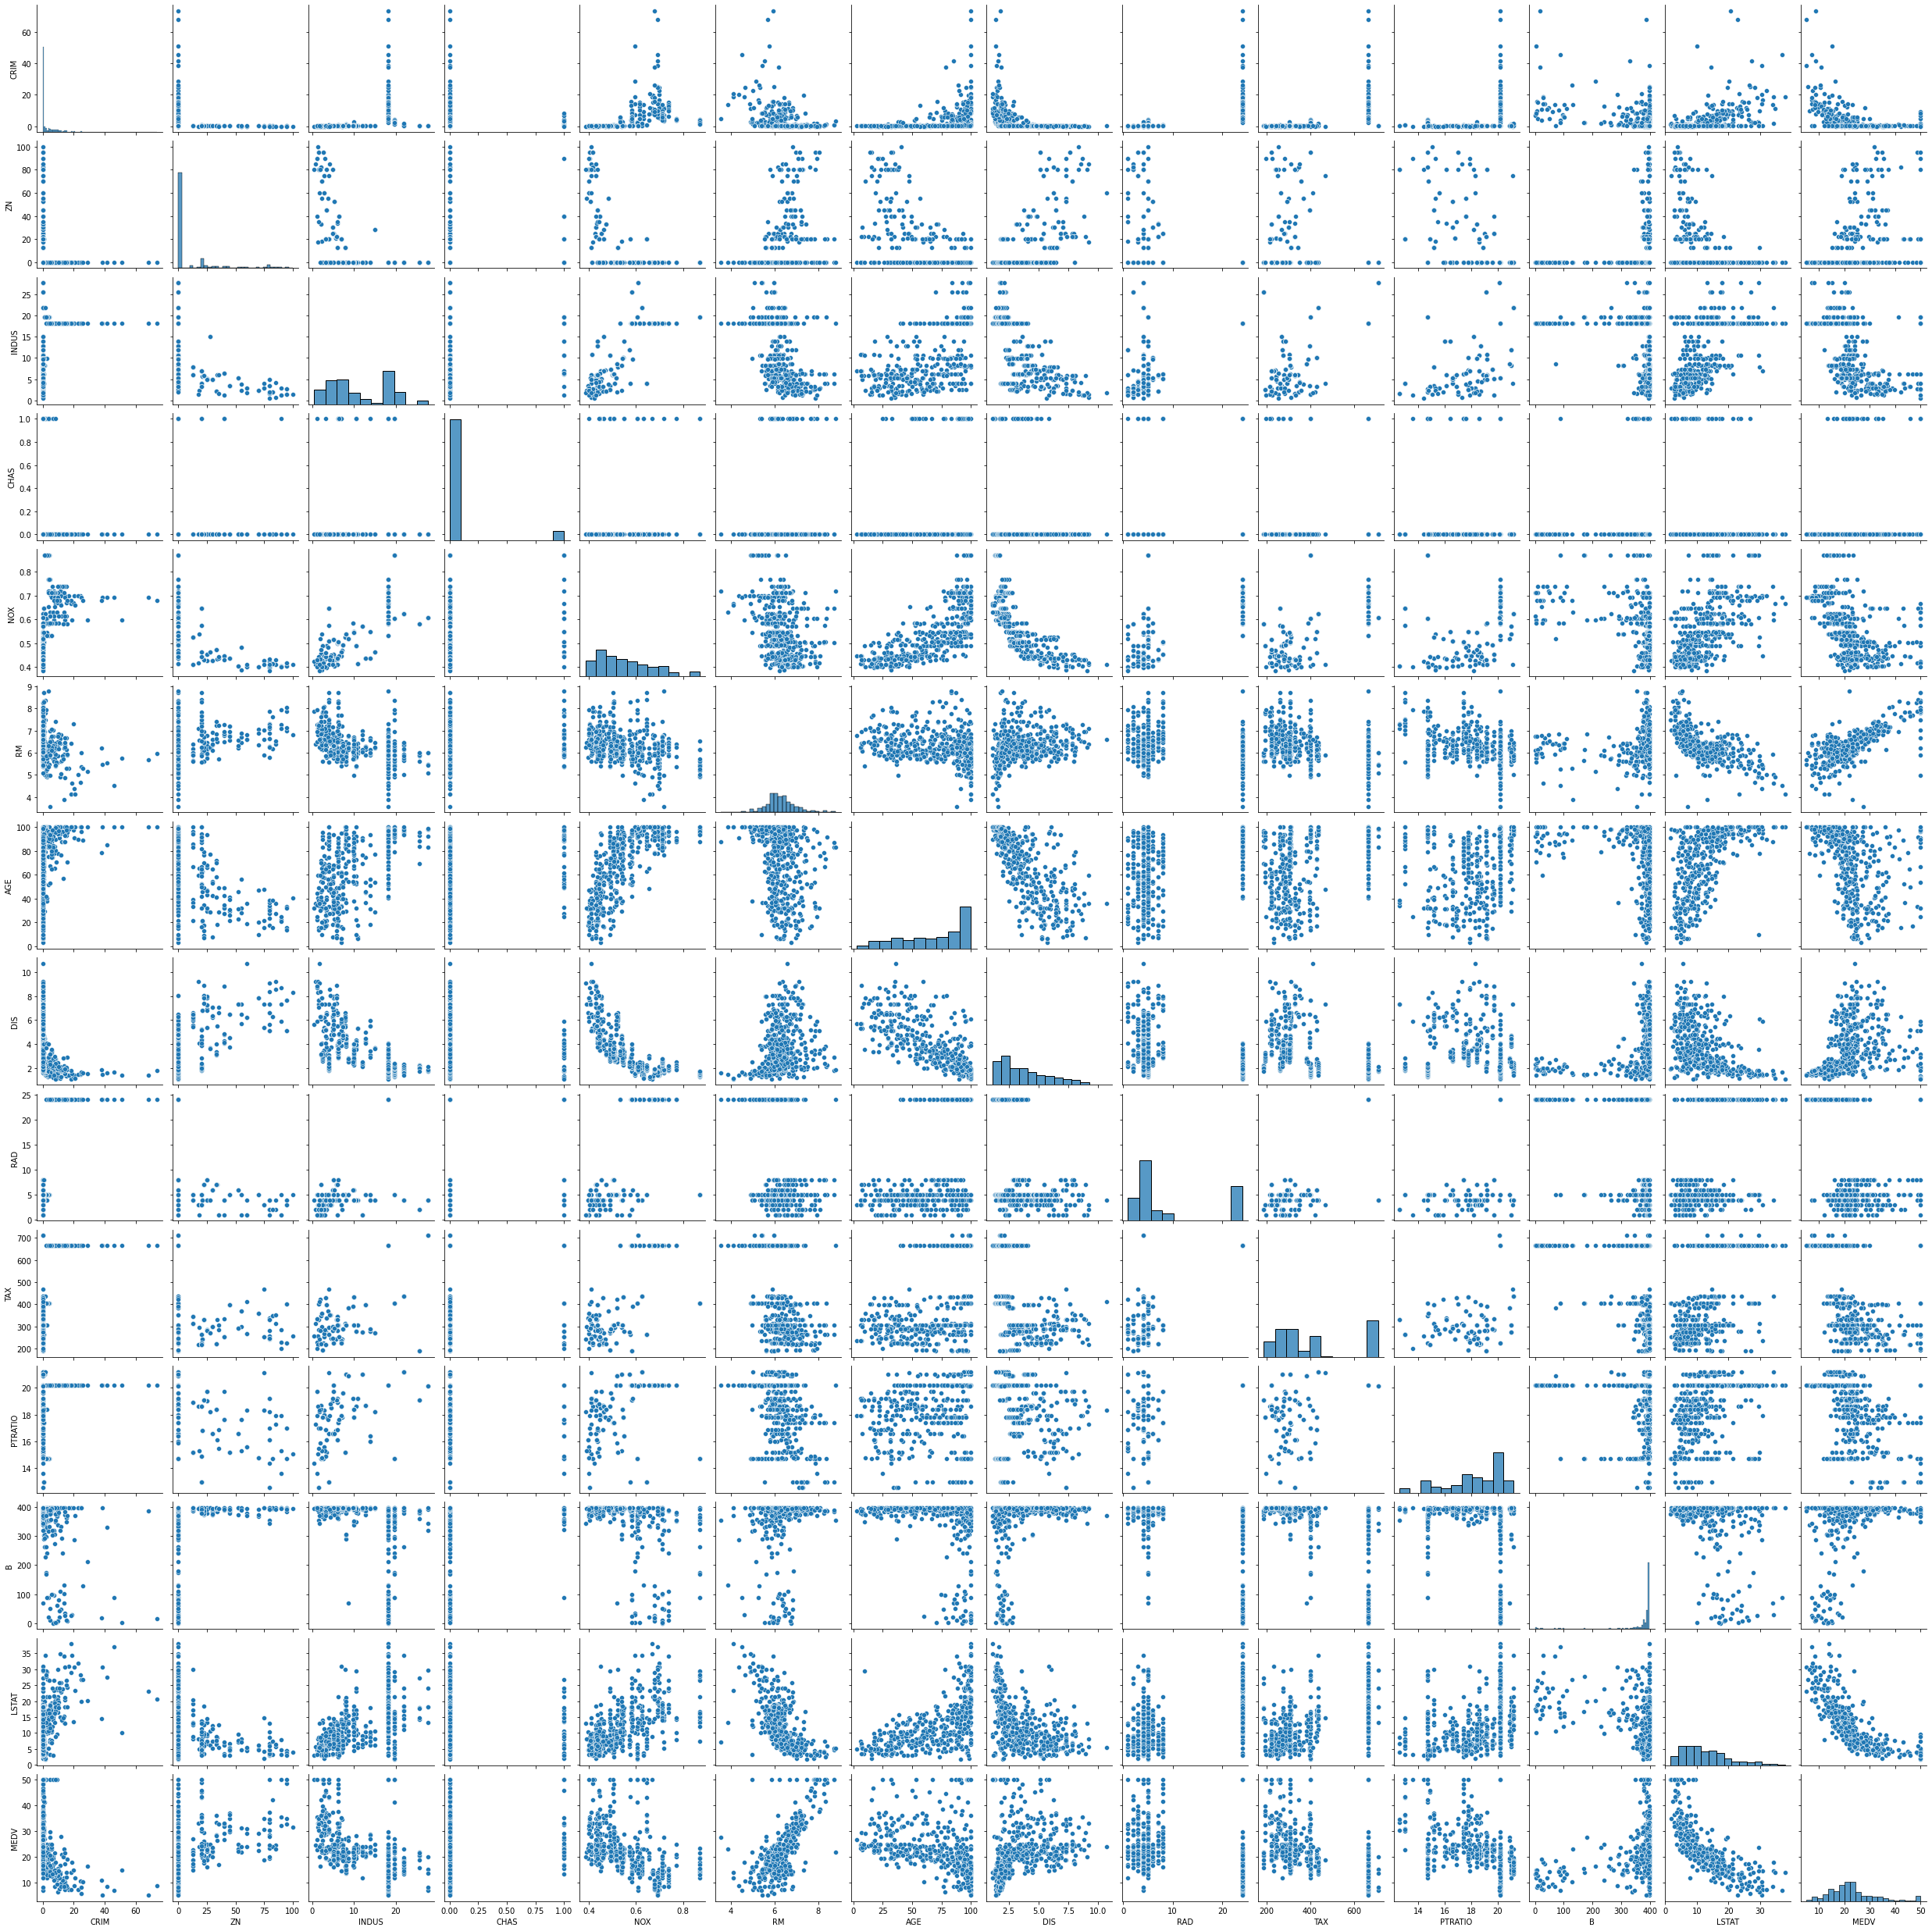

In [13]:
sns.pairplot(data_train)

In [14]:
corr_mat = data_train.corr()

<AxesSubplot:>

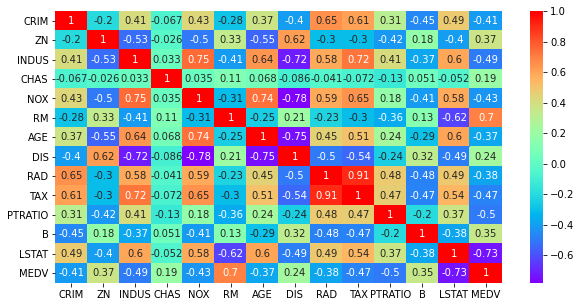

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_mat,annot=True, cmap='rainbow')

In [16]:
# MEDV: 
# direct correlation with RM make sense -> more room, more expensive
# inverse correlation with LSTAT make sense -> less income, less price the house owned
